# Playground for map visualization

In [1]:
#from ipyleaflet import Map, basemaps, LocalTileLayer
from ipyleaflet import (Map, GeoData, basemaps, WidgetControl, GeoJSON,
      LayersControl, Icon, Marker,basemap_to_tiles, Choropleth,
      MarkerCluster, Heatmap,SearchControl, 
      FullScreenControl,basemaps, LocalTileLayer)
import geopandas as gpd
from owslib.wfs import WebFeatureService

/home/nico/apps/environments/pynetworkanalysis/lib/python3.6/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
# basedir for your files ending with as slash
data_dir='/home/nico/data/tmp/oud/'
wfs_gebieden='https://api.data.amsterdam.nl/v1/wfs/gebieden/'

In [3]:
WfsUrl = wfs_gebieden
wfs = WebFeatureService(url=WfsUrl, version='2.0.0')
print(wfs.identification.title)
print(list(wfs.contents))

gebieden
['app:bouwblokken', 'app:buurten', 'app:wijken', 'app:ggwgebieden', 'app:ggpgebieden', 'app:stadsdelen']


In [4]:
layer='stadsdelen'
response = wfs.getfeature(typename=layer, outputFormat='geojson')

In [5]:
f_stadsdelen='stadsdelen.geojson'
with open(f_stadsdelen, 'wb') as file:
    file.write(response.read())
gdf_stadsdelen = gpd.read_file(f_stadsdelen)

In [6]:
#119966.13, 484827.96 (52.3502405, 4.8730170)
center=52.348796 , 4.874156
centerRD1=484827 , 119966
centerRD2=119966 , 484827
zoom=12
# default value crs = projections.EPSG3857
# {'name': 'EPSG3857', 'custom': False}
coordsysrd={'name': 'EPSG28992', 'custom': False}
coordsyswm={'name': 'EPSG3857', 'custom': False}


In [7]:
m = Map(center=center, zoom=zoom, crs=coordsyswm)
#https://t1.data.amsterdam.nl/topo_wm_zw/15/15137/17281.png
#m.add_layer(LocalTileLayer(path='tiles/{z}/{x}/{y}.png'))
#m.add_layer(LocalTileLayer(path='https://t1.data.amsterdam.nl/topo_wm_zw/{z}/{x}/{y}.png'))
m.add_layer(LocalTileLayer(path='https://t1.data.amsterdam.nl/topo_wm_zw/{z}/{x}/{y}.png'))
m

Map(center=[52.348796, 4.874156], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

In [8]:
print(m.crs)

{'name': 'EPSG3857', 'custom': False}


<AxesSubplot:>

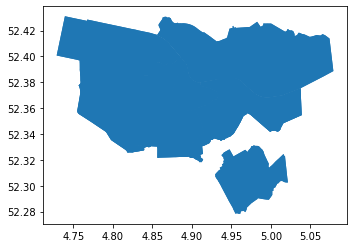

In [9]:
# add city parts..
# transform to webmercator
gdf_stadsdelenwm=gdf_stadsdelen.to_crs("EPSG:4326")
gdf_stadsdelenwm.plot()

In [10]:
# add them to the map
m2 = Map(basemap=basemaps.CartoDB.DarkMatter, center=center, zoom=zoom, crs=coordsyswm)
# Create a geodata
cityparts = GeoData(geo_dataframe = gdf_stadsdelenwm, 
 style={'color': 'grey', 'fillColor': '#99d6ff', 'opacity':0.7, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.2},
 hover_style={'fillColor': '#004d80' , 'fillOpacity': 0.8},
 name = 'stadselen')

In [11]:
m.add_layer(cityparts)
m.add_control(LayersControl())
m

Map(bottom=344904.0, center=[52.348796, 4.874156], controls=(ZoomControl(options=['position', 'zoom_in_text', …

In [12]:
Map(basemap=basemaps.CartoDB.DarkMatter, center=center, zoom=zoom)

Map(center=[52.348796, 4.874156], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

In [13]:
Map(basemap=basemaps.Esri.WorldStreetMap, center=center, zoom=zoom)

Map(center=[52.348796, 4.874156], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

In [14]:
Map(basemap=basemaps.Esri.WorldTopoMap, center=center, zoom=zoom)

Map(center=[52.348796, 4.874156], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

In [15]:
Map(basemap=basemaps.CartoDB.Positron, center=center, zoom=zoom)

Map(center=[52.348796, 4.874156], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

In [16]:
Map(basemap=basemaps.Esri.WorldImagery, center=center, zoom=zoom)

Map(center=[52.348796, 4.874156], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …